
# Plane Crash!
Author: **Keanu Richards and Ben Grant**

Run the cell below each time the notebook is started or restarted to ensure that if you change any code in the library, this notebook will use the latest version of the library code.

In [1]:
%load_ext autoreload
%autoreload 2


## Crashes by year over time

### Imports

In [2]:
import dateparser as dp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
plt.rcParams["font.family"] = "times"

In [3]:
data = pd.read_csv("all_data.csv")

In [4]:
dates = data["Date:"]

crashes_by_year = {}

for date in dates:
    # if crashes_by_year

    # use date parser on date:
    year = dp.parse(date).year

    if year in crashes_by_year:
        crashes_by_year[year] += 1
    else:
        crashes_by_year[year] = 1

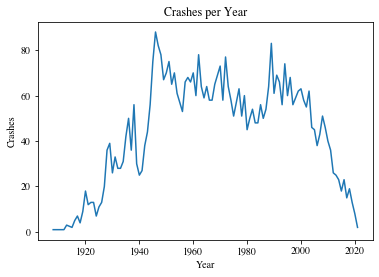

In [5]:
# line Graph
plt.plot(crashes_by_year.keys(), crashes_by_year.values())

# Plot labeling
plt.title("Crashes per Year")
plt.xlabel("Year")
plt.ylabel("Crashes")

plt.show()

In [6]:
# dictionary to hold each month (keys) and the total number of crashes in that month (values)
crashes_by_month = {}

for date in dates:
    # use date parser on date:
    month = dp.parse(date).month

    # build dictionary
    if month in crashes_by_month:
        crashes_by_month[month] += 1
    else:
        crashes_by_month[month] = 1

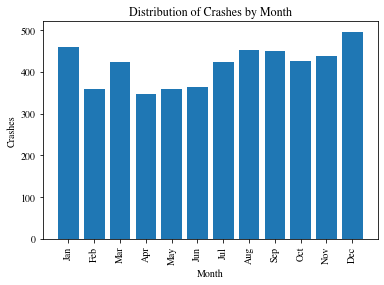

In [7]:
import collections

# Had to convert to an ordered dictionary to get the month labels to work correctly
od = collections.OrderedDict(sorted(crashes_by_month.items()))

# Month labels
labels = ['Jan', 'Feb', 'Mar', 'Apr', "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(list(od.keys()), labels, rotation='vertical')

# Bar graph of data
plt.bar(od.keys(), od.values())

# Plot labeling
plt.title("Distribution of Crashes by Month")
plt.xlabel("Month")
plt.ylabel("Crashes")

plt.show()

## Plans / next steps:
- ~~Normalize the crash data by totals for each year~~

- Research what has changed in the industry

- ~~Fatalities~~
    
- ~~find cool data visualiztions to do for a third something to look at~~
    

## Plotting flights from 2000 to 2020:

In [8]:
# flights from 2000 - 2020
flights_by_month = pd.read_csv("Air_Traffic.csv")

# dictionary to hold each flight year (keys) and the total number of flights that year (values)
flights_by_year = {}

for _, flight in flights_by_month.iterrows():
    # use date parser on date:
    year = dp.parse(flight["Period"]).year

    # build dictionary
    if year in flights_by_year:
        flights_by_year[year] += flight["Total"]
    else:
        flights_by_year[year] = flight["Total"]

In [9]:
# plt.bar(flights_by_year.keys(), flights_by_year.values())

# # Plot labeling
# plt.title("Total Flights per Year from 2000 to 2020")
# plt.ylabel("Flights")
# plt.xlabel("Year")
# plt.xticks(range(2000, 2021, 2), rotation='vertical')

# plt.show()

## Plotted bar graph with one column that is total flights from July of 2004 and another column that is total listed crashes of all time

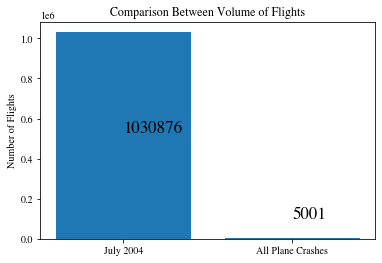

In [41]:
jul_04_total = flights_by_month.loc[flights_by_month['Period'] == "July 2004"].values[0][1]

crashes_total = sum(crashes_by_year.values())

plt.bar(["July 2004", "All Plane Crashes"], [jul_04_total, crashes_total])

# Plot labeling
plt.title("Comparison Between Volume of Flights")
plt.ylabel("Number of Flights")
plt.text(0 , jul_04_total - 500000 , s=f"{jul_04_total}" , fontdict=dict(fontsize=17))
plt.text(1 , crashes_total + 100000 , s=f"{crashes_total}" , fontdict=dict(fontsize=17))

plt.show()

## Normalizing crashes from 2000 to 2020:

In [11]:
# dataframe of all crashes from the crashes_by_year dictionary
crashes_by_year_all_time = pd.DataFrame(crashes_by_year.items(), columns = ["year", "crashes"])

# select crashes from years 2000 to 2020
crashes_00_20 = crashes_by_year_all_time.loc[crashes_by_year_all_time['year'].isin(range(2000, 2021))].reset_index(drop=True)

# build dataframe for flights from years 2000 to 2020
flights_00_20 = pd.DataFrame(flights_by_year.items(), columns = ["year", "flights"])

## build final dataframe:
flights_and_crashes = flights_00_20
flights_and_crashes["crashes"] = crashes_00_20["crashes"]

# normalize crashes by year
flights_and_crashes["normalized"] = [ row["crashes"]/row["flights"] for _, row in flights_00_20.iterrows()]

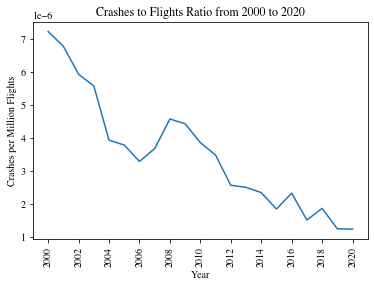

In [12]:
plt.plot(flights_and_crashes["year"], flights_and_crashes["normalized"])

# Plot labeling
plt.title("Crashes to Flights Ratio from 2000 to 2020")
plt.ylabel("Crashes per Million Flights")
plt.xlabel("Year")
plt.xticks(range(2000, 2021, 2), rotation='vertical')

plt.show()

## Fatalities (total per year)

In [13]:
fatalities = data[["Date:","Fatalities:"]]

fatalities_by_year = {}

for _, row in fatalities.iterrows():
    # split the Fatalities String at the integer representing total deaths
    deaths = row["Fatalities:"].split(" ", 1)[0]
    
    if deaths == "?":
        deaths = 0
    else:
        deaths = int(deaths)

    year = dp.parse(row["Date:"]).year

    if year in fatalities_by_year:
        fatalities_by_year[year] += deaths
    else: 
        fatalities_by_year[year] = deaths

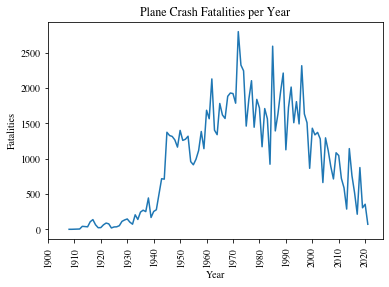

In [14]:
plt.plot(fatalities_by_year.keys(), fatalities_by_year.values())

# Plot labeling
plt.title("Plane Crash Fatalities per Year")
plt.ylabel("Fatalities")
plt.xlabel("Year")
plt.xticks(range(1900, 2021, 10), rotation='vertical')

plt.show()

## Average Fatalities per Crash

In [52]:
fatalities_by_year_all_time = pd.DataFrame(fatalities_by_year.items(), columns = ["year", "fatalities"])

average_fatalities = crashes_by_year_all_time
average_fatalities["fatalities"] = pd.DataFrame(fatalities_by_year.items(), columns = ["year", "fatalities"])["fatalities"]

average_fatalities["fatalities/crash"] = average_fatalities["fatalities"]/average_fatalities["crashes"]

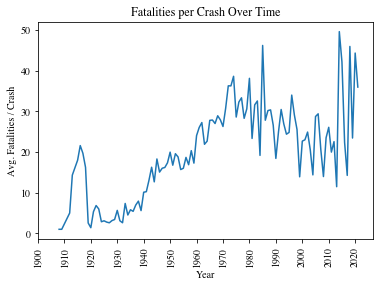

In [56]:
plt.plot(average_fatalities["year"], average_fatalities["fatalities/crash"])

# Plot labeling
plt.title("Fatalities per Crash Over Time")
plt.ylabel("Avg. Fatalities / Crash")
plt.xlabel("Year")
plt.xticks(range(1900, 2021, 10), rotation='vertical')

plt.show()

## Timeline

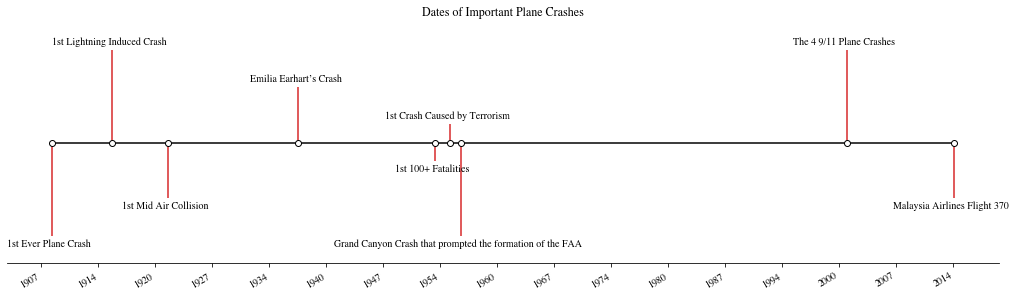

In [15]:
# Hard Code for Timeline:

names = ['1st Ever Plane Crash', '1st Lightning Induced Crash', 
         '1st Mid Air Collision', 'Emilia Earhart’s Crash',
         '1st 100+ Fatalities', '1st Crash Caused by Terrorism',
         'Grand Canyon Crash that prompted the formation of the FAA',
         'The 4 9/11 Plane Crashes', 'Malaysia Airlines Flight 370']
dates = ['1908-09-17', '1915-09-03', '1922-04-07', '1937-07-02', '1953-06-18',
         '1955-04-11', '1956-06-30', '2001-09-11', '2014-03-08']

dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(14, 4), constrained_layout=True)
ax.set(title="Dates of Important Plane Crashes")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="center")

ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=80))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.15)
plt.show()